In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('medicalcostcsv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [5]:
data.tail().T

,1333,1334,1335,1336,1337
age,50,18,18,21,61
sex,male,female,female,female,female
bmi,30.97,31.92,36.85,25.8,29.07
children,3,0,0,0,0
smoker,no,no,no,no,yes
region,northwest,northeast,southeast,southwest,northwest
charges,10600.5483,2205.9808,1629.8335,2007.945,29141.3603


In [6]:
data_copy = pd.DataFrame(data)

In [7]:
data.shape

(1338, 7)

In [8]:
data_copy.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [11]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [12]:
data['sex'].value_counts().sort_values()

female    662
male      676
Name: sex, dtype: int64

In [13]:
data['smoker'].value_counts().sort_values()

yes     274
no     1064
Name: smoker, dtype: int64

<Figure size 400x400 with 0 Axes>

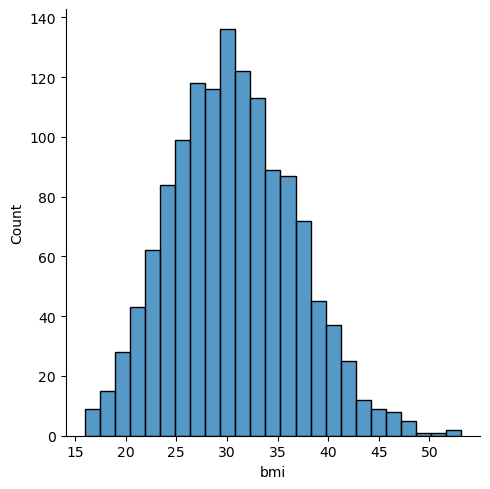

In [14]:
plt.figure(figsize=(4,4))
sns.displot(data=data,x='bmi')

<Figure size 300x300 with 0 Axes>

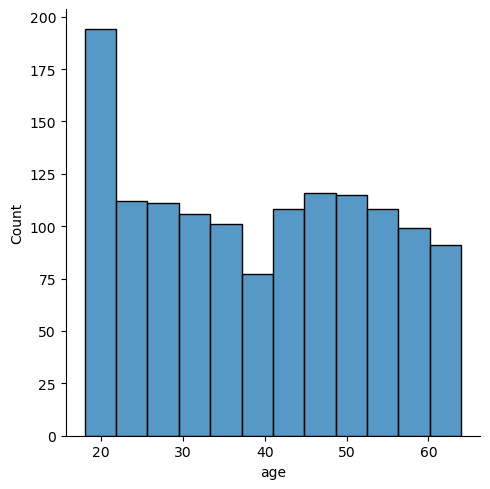

In [15]:
plt.figure(figsize=(3,3))
sns.displot(data=data,x='age')

In [16]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<Figure size 400x400 with 0 Axes>

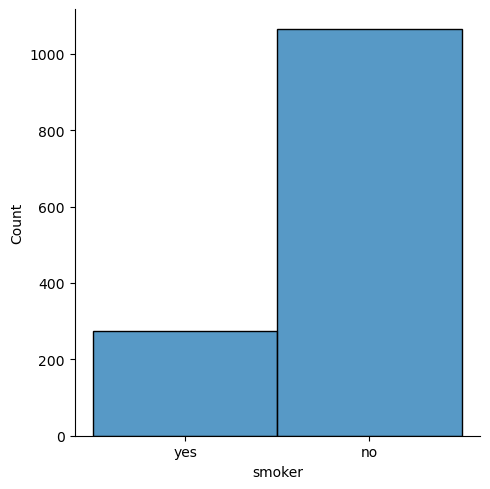

In [17]:
plt.figure(figsize=(4,4))
sns.displot(data=data,x='smoker')

In [20]:
corr = data_copy.corr()

Text(0.5, 1.0, 'Dependencies of Medical Charges')

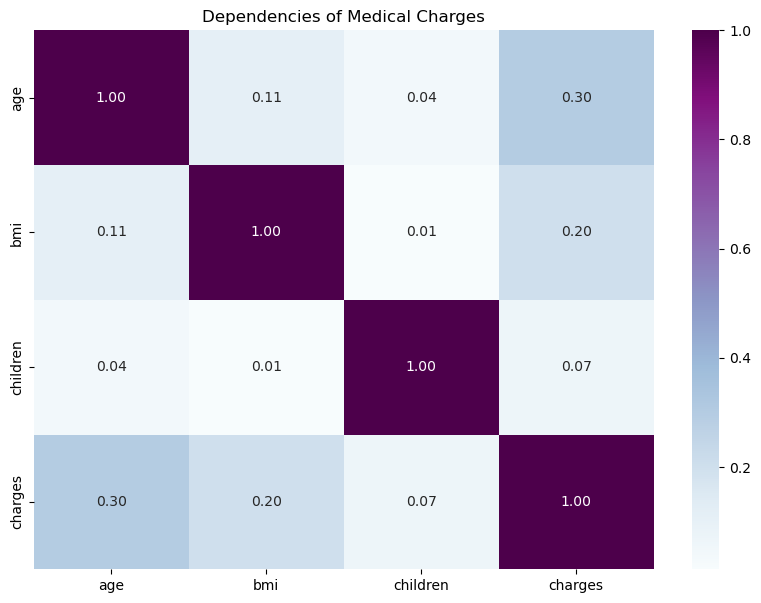

In [21]:
data_copy = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap='BuPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")

In [22]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'yes': 0, 'no': 1})
data['region']=data['region'].replace({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [24]:
x = data.drop('charges',axis=1)
y = data['charges']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=42)

In [26]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

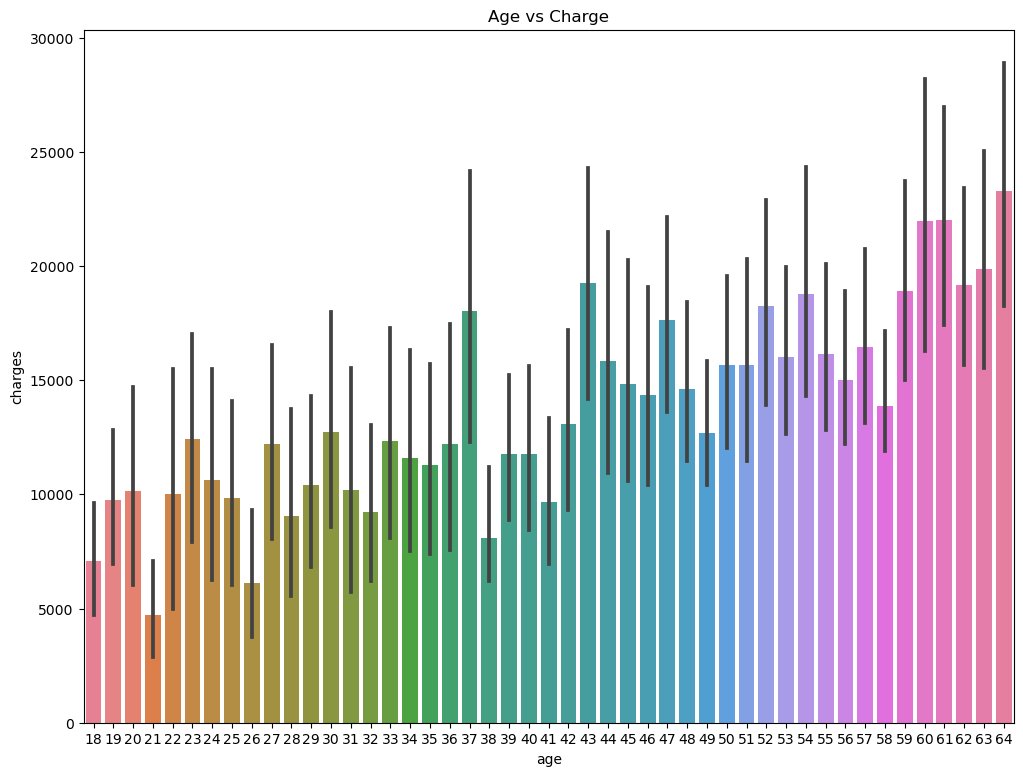

In [27]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

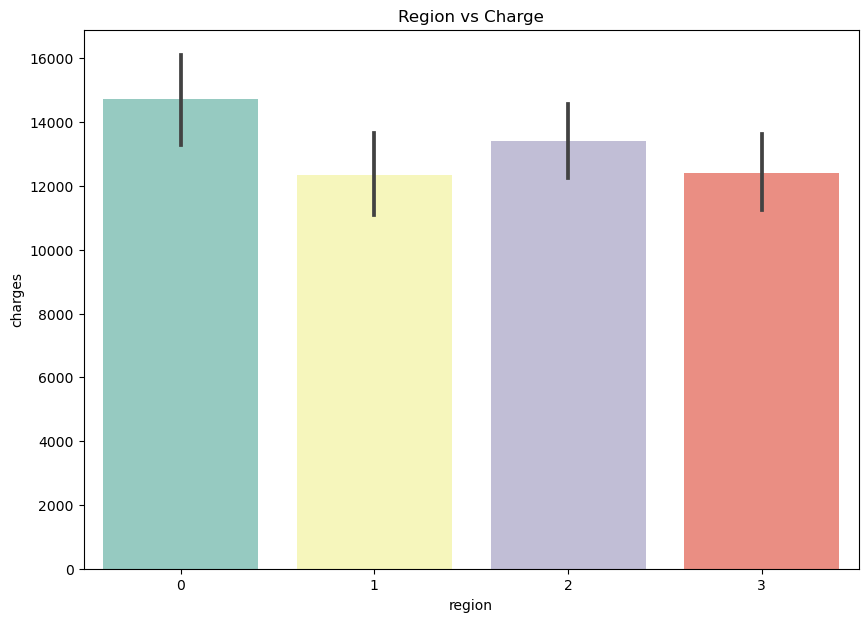

In [28]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

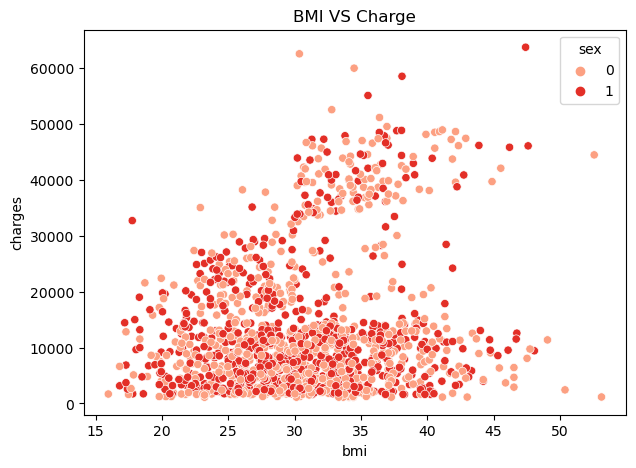

In [29]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

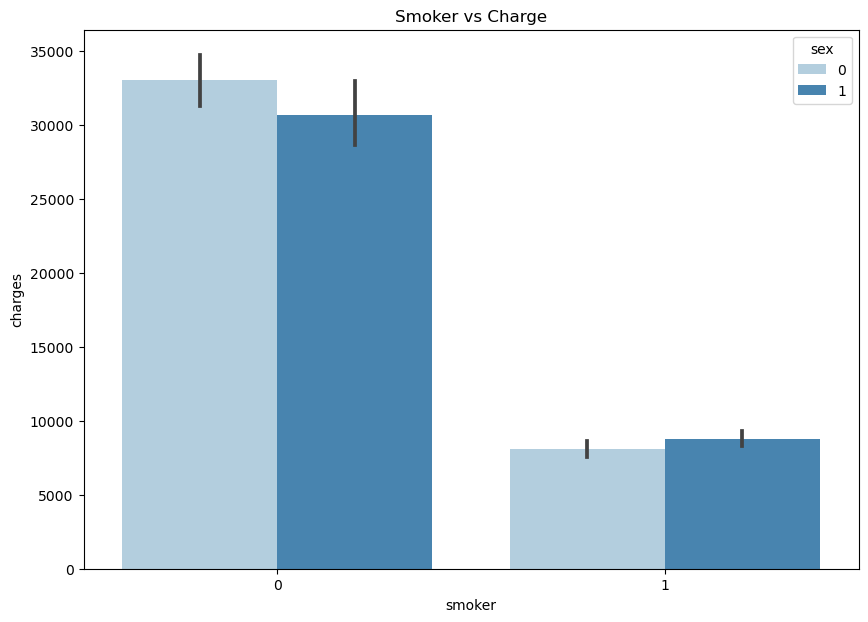

In [30]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

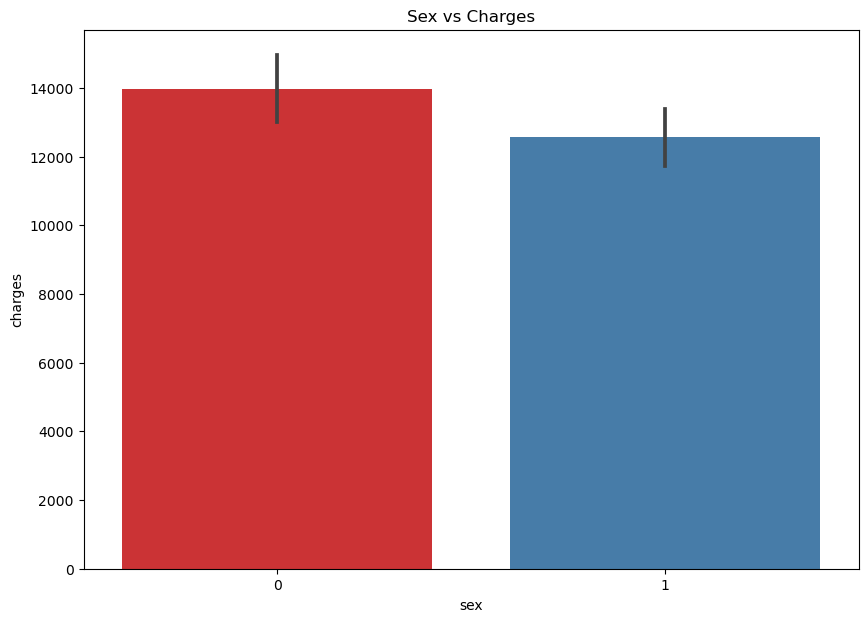

In [31]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

In [32]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness -1.465 and  Kurtosis 0.146
region : Skewness 0.049 and  Kurtosis -1.387
charges : Skewness 1.516 and  Kurtosis 1.606


In [43]:
input_data = data.drop(columns='charges')
output_data = data['charges']

In [44]:
input_train_data, input_test_data,output_train_data,output_test_data = train_test_split(input_data,output_data,test_size=0.2)

In [45]:
print(output_data.shape,output_train_data.shape,output_test_data.shape)

(1338,) (1070,) (268,)


In [46]:
model = RandomForestRegressor(n_estimators=100,max_depth=7)

In [47]:
model.fit(input_train_data,output_train_data)

RandomForestRegressor(max_depth=7)

In [48]:
test_data_predictions = model.predict(input_test_data)

In [49]:
test_data_predictions

array([ 2083.54902619,  3951.61408281,  4104.42919323, 15665.22751765,
       15004.15805532,  4754.22648688, 10394.59096711,  7009.23719661,
        9439.59949752, 13497.28041521, 44310.18406759,  2723.03635797,
       35907.21878781,  3660.05943872, 14715.17234933, 47271.01774082,
        8620.2137076 , 13347.39513964, 46887.94131797,  6716.85335946,
       11848.61727042, 43112.48413243,  5961.43849018,  6087.67994605,
        6792.58772061,  5927.16550613, 10952.83000812, 41640.16469141,
       27548.74691937, 38959.19348761, 23864.28590942,  6389.7779761 ,
       15136.1038424 ,  5305.95421604,  7754.76634456,  5364.2123062 ,
        8702.32041338, 13128.58574971,  6538.66998701,  7078.9849793 ,
       18873.11543556,  6686.68085121, 11272.89966765,  6597.35312211,
        7315.430246  , 39867.82955078,  9059.08280198,  2122.57415803,
        2784.92076559, 12527.62480858,  2326.40929069, 40792.87122671,
       10278.47767009, 18728.53577256,  6742.19295002,  5852.6748503 ,
      

In [50]:
r2_score(test_data_predictions,output_test_data)

0.7500932610012081

In [51]:
input_data =(23,1,35,2,5,0)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)

In [52]:
insurance_cost = model.predict(input_data_array)

In [53]:
insurance_cost[0]

4229.185338811995